首先是导入MerkleTree

In [1]:
from MerkleTree import *
import random

导入成功之后，我们可以构建一棵最基本的树~

INFO: 构建了个寂寞


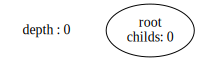

In [2]:
# 构建一颗Merkle树
mt = MerkleTree()

# 构建数据 -> nodeData
nodeData = []

# 构建一棵树，方法选择 imbalance
mt.build_merkle_tree(nodeData, way='imbalance')

# 展示
mt.show()

这里我们看到，我们初始化来了一棵最基本的树（或树桩），左侧显示的是这棵树的高度    
我们其实可以向这棵树中添加数据，如下所示

INFO: 节点构造完成： Node(value=62, prime=53, hash=81037370ddd1e5470fc82bf1df9574556af77e76bbb6092cd1db92f2f2fed715)


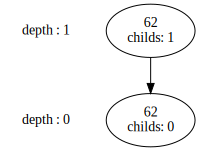

In [3]:
# 随机构建一个数据
num = random.randint(1,99)

# 添加到树中
mt.add(str(num))

# 展示
mt.show()

INFO: 节点构造完成： Node(value=42, prime=19, hash=48d12a406d32bad42337036880b685fe613d10d0b8f80befc6777ff3c71915d1)
INFO: 节点构造完成： Node(value=36, prime=947, hash=e1e89f015e5631b0a7cf9a8c8fb2c34a939c076b86df98cf8d7b46a9e6fb4b48)
INFO: 节点构造完成： Node(value=55, prime=1009, hash=2dc36bcb07d9fe4c9ffe10f83b6c9dd90cf37f525035fd07c6af613b50f672c2)
INFO: 节点构造完成： Node(value=66, prime=593, hash=65fd424ef696e2dd8f3ebd21fb3d71465800574d235c161599bd77cf3c1b3160)
INFO: 节点构造完成： Node(value=39, prime=179, hash=0a7af20fd550f13fe730020664f1b73de7c98ea7397ec6df9e6e203abd581374)
INFO: 节点构造完成： Node(value=86, prime=673, hash=8eb9f239e99b64c14bd2790b2691ee01dfa75dad5b83e96425c1f75c36cd6c62)
INFO: 节点构造完成： Node(value=17, prime=337, hash=3590eebb179e20c38dcd0ce9931059891abb5fbf02fc7975df23751aed9b5a9c)
INFO: 节点构造完成： Node(value=97, prime=1019, hash=100c320be51f34fdb20e5ea0738a32608330d87cdb1e8a2c3e8a3891ad81f600)
INFO: 节点构造完成： Node(value=30, prime=157, hash=8f6dac4ffd789021f960ca587594eae920021bf2dd8b8295f1569ef0b7a0ee49)


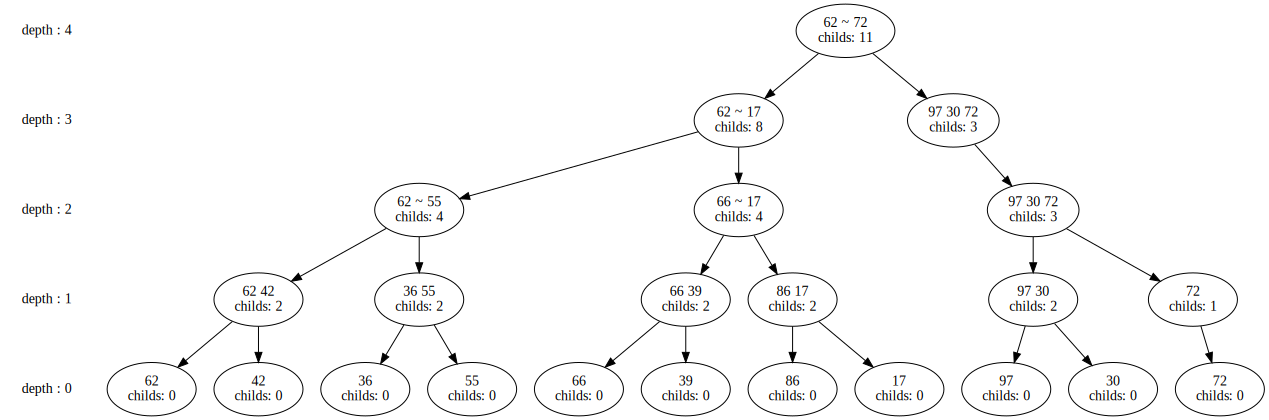

In [4]:
# 多添加一些节点
for _ in range(10):
    num = random.randint(1,99)
    mt.add(str(num))

# 展示
mt.show()

我们看到了，一棵“枝繁叶茂”的树，我们可以在树中标记出新增的节点  
最近一次新增加的节点使用红色进行标注 

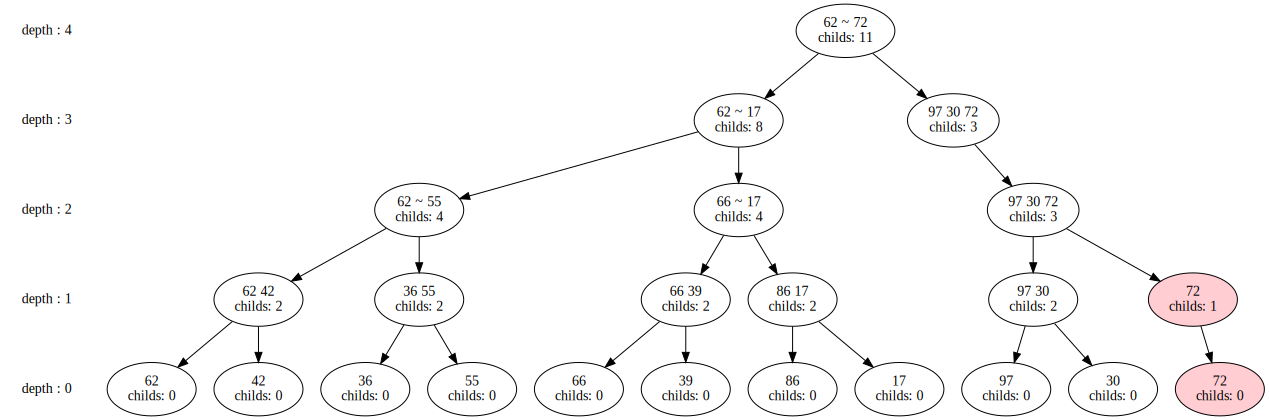

In [5]:
mt.compare()

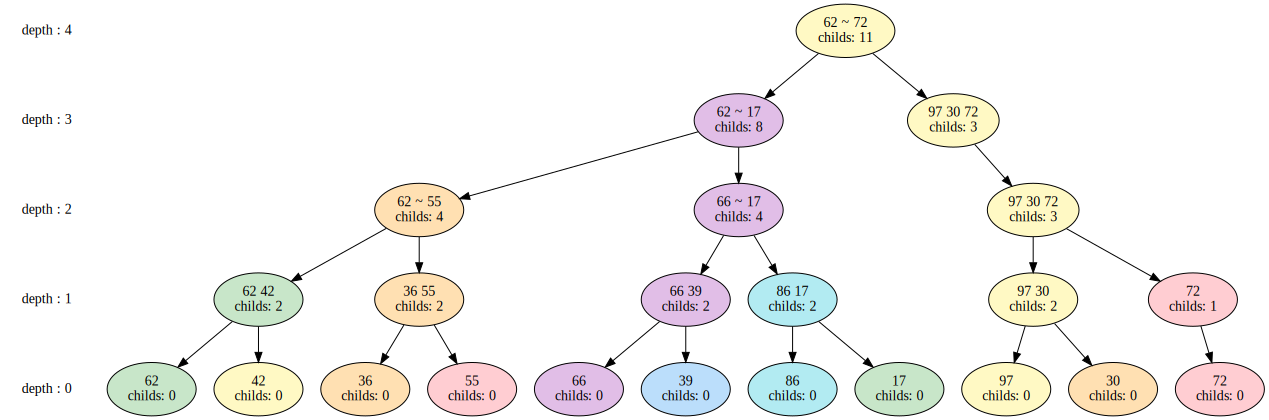

In [6]:
# 显示每一次添加节点的情况，纵向颜色相同的 代表是同一代
mt.compare(showHistory=True)

通过不断地增加节点，我们就可以拥有一棵很茂盛的树    
有时是我们会在这棵树上进行查询的工作，有两个方面：
- 证明一个数据是不是存在
- 证明一个数据是不是不在

分析：
本科学习密码学的时候接触到了 RSA。其中，安全性的关键在于 大素数 $P$ 的因数分解    
我们想要验证一个数是不是这个 $P$ 的因数，很容易；但是想要拆分出这个大素数的所有因数是很困难的。 
所以，我就想使用这个方法：
- 为每一个 “叶子” 随机生成一个素数
- 自下而上的，父节点的 “数” 为子节点 “数” 的乘积。

PS：上一回使用这个思路是在做 **Leetcode 49. 字母异位词分组** 的时候

In [7]:
# 获取整棵树所有数据自己的素数id
mt.getTreePrime()

['53', '19', '947', '1009', '593', '179', '673', '337', '1019', '157', '877']

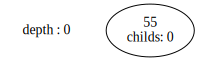

In [8]:
# 根据知道的素数id 就可以
mynode, proofPath = mt.search(1009)

# 展示
mt.show(mynode)

proofPath 变量中存放着证明这个节点真实存在的 **Merkle 路径**

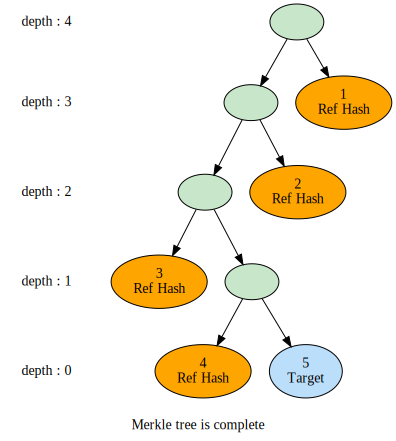

In [9]:
# 验证一下水电费
mt.merkle_path(proofPath)

颜色解释：
- 橙色：表示需要提供给 “请求者” 的作证 hash 值
- 蓝色：“请求者” 想要证明存在的节点
- 绿色：hash 值验证成功的节点

当我们将橙色的节点们发送给 “请求者” 的时候，可能会遇到 数据被篡改 的情况。  
这时候，我们可以再次验证

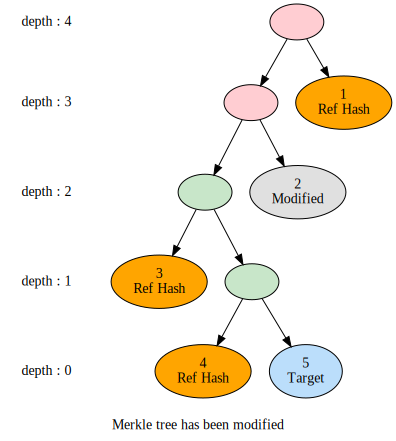

In [10]:
# 篡改第 3 号节点的 hash 数据
proofPath_2 = mt.tampering_test(proofPath,2)

# 验证一下
mt.merkle_path(proofPath_2)